In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

CREAR PUNTOS

In [4]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.70, random_state=1)

Los puntos con coordenadas

In [5]:
print(X[:5])

[[-6.96573381 -9.91464081]
 [-8.16089889 -7.44355238]
 [-9.74065023 -3.09031911]
 [-2.11240159  5.03753069]
 [-7.18147629 -3.03676107]]


A que cluster pertenecen

In [6]:
print(y[:5])

[2 2 1 0 3]


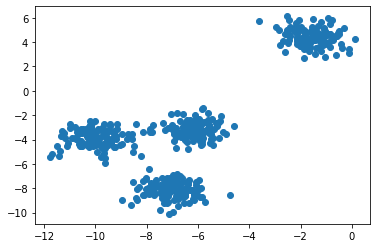

In [7]:
plt.scatter(X[:,0],X[:,1])

Método del codo

In [9]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

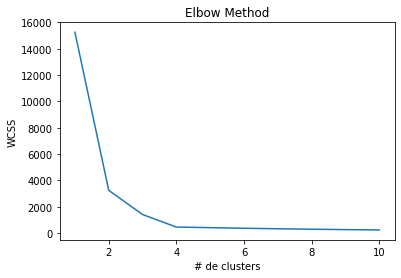

In [10]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("# de clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred_y = kmeans.fit_predict(X)

In [12]:
pred_y

array([2, 2, 3, 1, 0, 1, 0, 0, 3, 0, 2, 2, 0, 1, 0, 2, 3, 2, 1, 0, 3, 3,
       0, 1, 0, 0, 1, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 3, 2, 3, 0, 3, 1, 0,
       0, 2, 3, 0, 1, 1, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 1, 3, 0, 1, 0,
       2, 0, 3, 3, 2, 3, 0, 2, 0, 0, 2, 0, 0, 3, 1, 1, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 2, 3, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 3, 1, 0, 0, 1, 1, 3,
       0, 2, 1, 3, 1, 3, 1, 0, 1, 0, 3, 2, 2, 3, 0, 3, 1, 2, 2, 0, 1, 3,
       3, 3, 3, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 3, 3, 1, 2,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 0, 1, 2, 3, 0, 2, 1, 3,
       3, 3, 3, 2, 0, 3, 1, 2, 2, 3, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 3, 1, 0, 0, 2, 0, 3, 2, 0, 3, 0, 3, 2, 0, 0, 0, 1, 3, 1,
       0, 2, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 2, 3, 1, 1, 3, 2, 1, 2, 0, 3,
       2, 2, 2, 2, 0, 3, 2, 3, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 1, 3, 3,
       1, 0, 2, 2, 3, 3, 3, 0, 1, 1, 0, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 3, 3, 3, 0, 0, 0, 2, 1, 2, 3, 2, 0, 3,

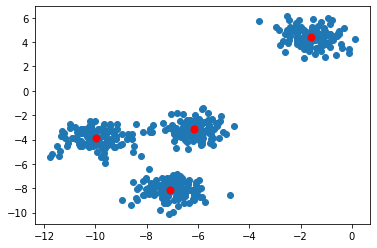

In [15]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1], s=50, c='red')
plt.show()

Práctica

Kmeans ++

In [22]:
iris = datasets.load_iris()
X1 = iris.data[:, :4]
y1 = iris.target

In [23]:
error = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X1)
  error.append(kmeans.inertia_)

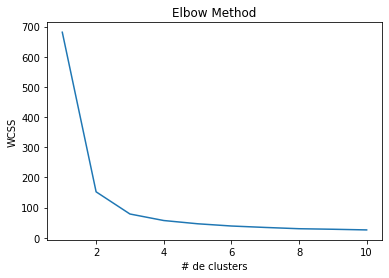

In [24]:
plt.plot(range(1,11), error)
plt.title("Elbow Method")
plt.xlabel("# de clusters")
plt.ylabel("WCSS")
plt.show()

El óptimo de clusters es k = 3

In [25]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred_y = kmeans.fit_predict(X1)

In [26]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

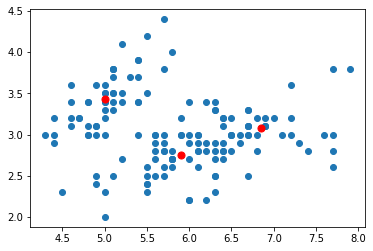

In [27]:
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1], s=50, c='red')
plt.show()

Accuracy de Kmeans ++

In [37]:
test_acc1 = accuracy_score(y1, pred_y)

In [39]:
print("El accuracy de Kmeans++ es: {}".format(test_acc1*100))

El accuracy de Kmeans++ es: 24.0


Regresion Logistica

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=5)

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

Accuracy de Regresion Logistica

In [40]:
print("El accuracy de la regresión logistica es: {}".format(test_acc*100))

El accuracy de la regresión logistica es: 96.66666666666667
